## FLIGHT PRICE PREDICTION
* Airline: The name of the airline.
* Date_of_Journey: The date of the journey
* Source: The source from which the service begins.
* Destination: The destination where the service ends.
* Route: The route taken by the flight to reach the destination.
* Dep_Time: The time when the journey starts from the source.
* Arrival_Time: Time of arrival at the destination.
* Duration: Total duration of the flight.
* Total_Stops: Total stops between the source and destination.
* Additional_Info: Additional information about the flight
* Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/PLAG/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df_test = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/PLAG/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* Price column may contain outliers due to the huge difference between 3rd quartile and maximum value

In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can remove the null values present in the Dataset as only two rows contain null values

In [7]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### DATA CLEANING

#### Removing Null Values

In [8]:
df_train.drop(df_train[df_train['Route'].isnull()].index[0],inplace=True,axis=0)
df_train.reset_index(inplace=True,drop=True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Given that the dataset is about Flight ticket prices, the same journey between the observed period may be recorded more than once and hence they should be removed.

In [9]:
a = list(df_train[df_train.duplicated()].index)
df_train.drop(a,axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10458,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10459,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10460,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#### Converting columns containing Date/Time values to 'datetime' data type

In [10]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])

df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'])
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 899.2+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


#### Creating New features from 'Date_of_Journey' column

In [12]:
from datetime import datetime
df_train['Month']=df_train['Date_of_Journey'].dt.month
df_train['Day']=df_train['Date_of_Journey'].dt.day
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-19 05:50:00,2021-04-19 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-19 18:05:00,2021-04-19 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-19 16:50:00,2021-04-19 21:35:00,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-19 19:55:00,2021-04-19 22:25:00,2h 30m,non-stop,No info,4107,9,4
10458,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-19 20:45:00,2021-04-19 23:20:00,2h 35m,non-stop,No info,4145,4,27
10459,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-19 08:20:00,2021-04-19 11:20:00,3h,non-stop,No info,7229,4,27
10460,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-19 11:30:00,2021-04-19 14:10:00,2h 40m,non-stop,No info,12648,1,3


In [13]:
from datetime import datetime
df_test['Month']=df_test['Date_of_Journey'].dt.month
df_test['Day']=df_test['Date_of_Journey'].dt.day
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-19 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-19 06:20:00,2021-04-19 10:20:00,4h,1 stop,No info,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 08:00:00,2021-04-19 21:00:00,13h,1 stop,No info,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-19 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-19 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,6,6
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-19 14:20:00,2021-04-19 16:55:00,2h 35m,non-stop,No info,3,27
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,6,3
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 04:00:00,2021-04-19 19:15:00,15h 15m,1 stop,No info,6,3


#### Creating new features from 'Dep_Time' and 'Arrival_Time' columns

In [14]:
df_train['Dep_Hour']=df_train['Dep_Time'].dt.hour
df_train['Dep_Min']=df_train['Dep_Time'].dt.minute
df_train['Arr_hour']=df_train['Arrival_Time'].dt.hour
df_train['Arr_min']=df_train['Arrival_Time'].dt.minute
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-19 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-19 05:50:00,2021-04-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-19 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-19 18:05:00,2021-04-19 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-19 16:50:00,2021-04-19 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-19 19:55:00,2021-04-19 22:25:00,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10458,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-19 20:45:00,2021-04-19 23:20:00,2h 35m,non-stop,No info,4145,4,27,20,45,23,20
10459,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-19 08:20:00,2021-04-19 11:20:00,3h,non-stop,No info,7229,4,27,8,20,11,20
10460,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-19 11:30:00,2021-04-19 14:10:00,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [15]:
df_test['Dep_Hour']=df_test['Dep_Time'].dt.hour
df_test['Dep_Min']=df_test['Dep_Time'].dt.minute
df_test['Arr_hour']=df_test['Arrival_Time'].dt.hour
df_test['Arr_min']=df_test['Arrival_Time'].dt.minute
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-19 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-19 06:20:00,2021-04-19 10:20:00,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 08:00:00,2021-04-19 21:00:00,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-19 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-19 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-19 14:20:00,2021-04-19 16:55:00,2h 35m,non-stop,No info,3,27,14,20,16,55
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 04:00:00,2021-04-19 19:15:00,15h 15m,1 stop,No info,6,3,4,0,19,15


#### Converting 'Duration' column to minutes

In [16]:
df_train['Duration_hr'] = df_train['Duration'].str.split('h').str[0]
df_train['Duration_min'] = df_train['Duration'].str.split('h').str[1]

In [17]:
# Moving minutes to 'Duration_min' column
df_train['Duration_min'] = df_train.apply( lambda row: row['Duration_hr'] if ('m' in row['Duration_hr'])  else row['Duration_min'],axis=1)

# Assigning 0 to 'Duration_hr' column where minute value is present
df_train['Duration_hr'] = df_train.apply( lambda row: '0' if ('m' in row['Duration_hr'])  else row['Duration_hr'],axis=1)

# Converting 'Duration_hr' column to 'int' datatype
df_train['Duration_hr'] = df_train['Duration_hr'].astype('int64')

# Replacing 'm' by '' in 'Duration_min' column
df_train['Duration_min'] = df_train['Duration_min'].str.replace('m','')

# Assigning 0 to 'Duration_min' column where minute value is not present
df_train['Duration_min'].replace('','0',inplace=True)

# Converting 'Duration_min' column to 'int' datatype
df_train['Duration_min'] = df_train['Duration_min'].astype('int64')

# Converting 'Duration' column to minutes
df_train['Duration'] = (df_train['Duration_hr']*60) + df_train['Duration_min']
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-19 22:20:00,2021-03-22 01:10:00,170,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-19 05:50:00,2021-04-19 13:15:00,445,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-19 09:25:00,2021-06-10 04:25:00,1140,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-19 18:05:00,2021-04-19 23:30:00,325,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-19 16:50:00,2021-04-19 21:35:00,285,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-19 19:55:00,2021-04-19 22:25:00,150,non-stop,No info,4107,9,4,19,55,22,25,2,30
10458,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-19 20:45:00,2021-04-19 23:20:00,155,non-stop,No info,4145,4,27,20,45,23,20,2,35
10459,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-19 08:20:00,2021-04-19 11:20:00,180,non-stop,No info,7229,4,27,8,20,11,20,3,0
10460,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-19 11:30:00,2021-04-19 14:10:00,160,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [18]:
df_test['Duration_hr'] = df_test['Duration'].str.split('h').str[0]
df_test['Duration_min'] = df_test['Duration'].str.split('h').str[1]

In [19]:
# Moving minutes to 'Duration_min' column
df_test['Duration_min'] = df_test.apply( lambda row: row['Duration_hr'] if ('m' in row['Duration_hr'])  else row['Duration_min'],axis=1)

# Assigning 0 to 'Duration_hr' column where minute value is present
df_test['Duration_hr'] = df_test.apply( lambda row: '0' if ('m' in row['Duration_hr'])  else row['Duration_hr'],axis=1)

# Converting 'Duration_hr' column to 'int' datatype
df_test['Duration_hr'] = df_test['Duration_hr'].astype('int64')

# Replacing 'm' by '' in 'Duration_min' column
df_test['Duration_min'] = df_test['Duration_min'].str.replace('m','')

# Assigning 0 to 'Duration_min' column where minute value is not present
df_test['Duration_min'].replace('','0',inplace=True)

# Converting 'Duration_min' column to 'int' datatype
df_test['Duration_min'] = df_test['Duration_min'].astype('int64')

# Converting 'Duration' column to minutes
df_test['Duration'] = (df_test['Duration_hr']*60) + df_test['Duration_min']
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-19 17:30:00,2021-06-07 04:25:00,655,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-19 06:20:00,2021-04-19 10:20:00,240,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 19:15:00,2021-05-22 19:00:00,1425,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-19 08:00:00,2021-04-19 21:00:00,780,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-19 23:55:00,2021-06-25 02:45:00,170,non-stop,No info,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-19 20:30:00,2021-06-07 20:25:00,1435,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-19 14:20:00,2021-04-19 16:55:00,155,non-stop,No info,3,27,14,20,16,55,2,35
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 21:50:00,2021-03-07 04:25:00,395,1 stop,No info,6,3,21,50,4,25,6,35
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-19 04:00:00,2021-04-19 19:15:00,915,1 stop,No info,6,3,4,0,19,15,15,15


#### Total_stops

In [20]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [21]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

#### Additional Info

In [22]:
df_train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [23]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [24]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

#### Dropping Unnecessary Columns

In [25]:
df_train.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration_hr', 'Duration_min'],axis=1,inplace=True)
df_test.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration_hr', 'Duration_min'],axis=1,inplace=True)

### EDA

### UNIVARIATE ANALYSIS

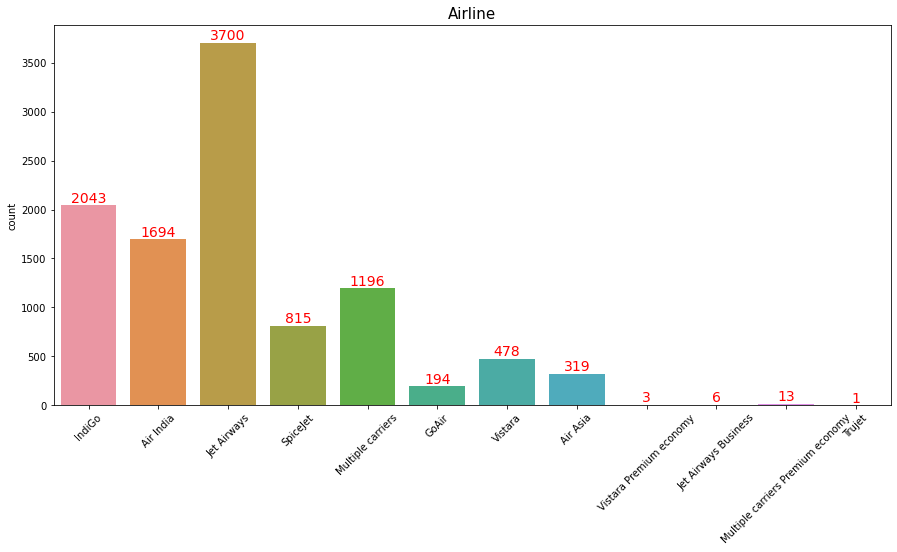

In [26]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Airline'])
ax.set_title('Airline',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* Jet Airways is the most commonly used Airline.

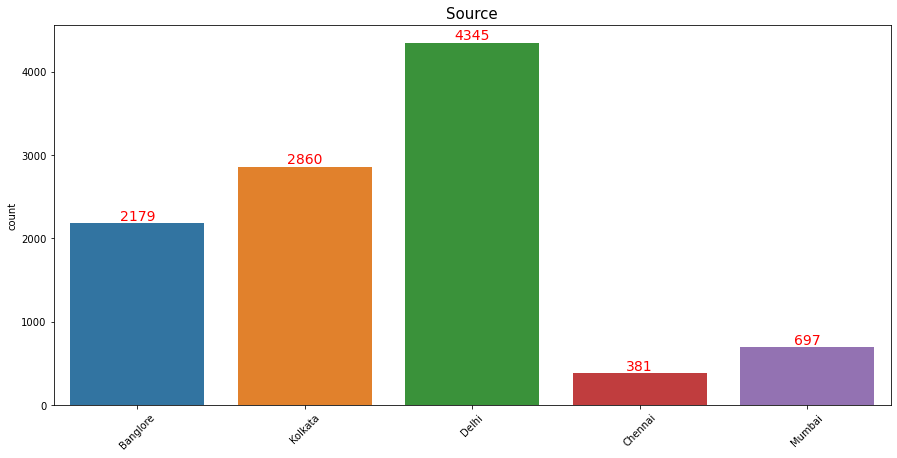

In [27]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Source'])
ax.set_title('Source',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* 'Delhi' is the most common source that people travel from.

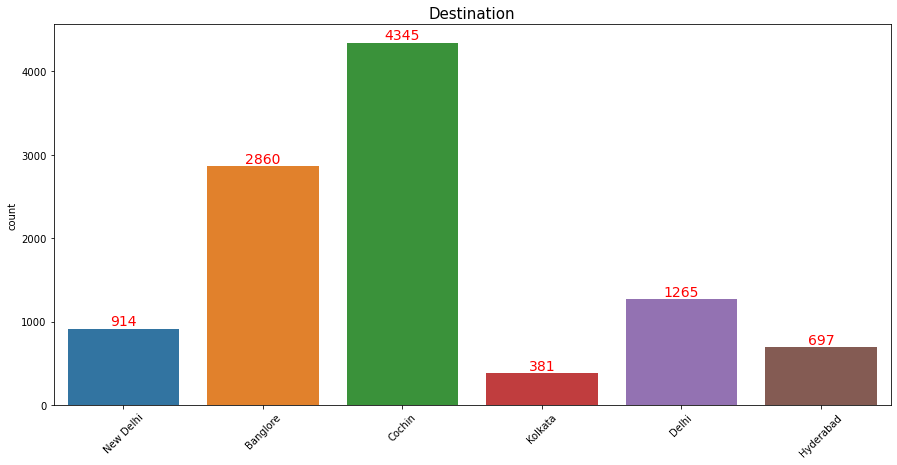

In [28]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Destination'])
ax.set_title('Destination',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* 'Cochin' is the most common Destination that people travel to.

In [29]:
df_train['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → CCU → BBI → HYD → VGA → DEL       1
BLR → HBX → BOM → BHO → DEL             1
BOM → UDR → DEL → HYD                   1
CCU → IXZ → MAA → BLR                   1
CCU → RPR → HYD → BLR                   1
Name: Route, Length: 128, dtype: int64

* There are 128 distinct routes and 'DEL -- BOM -- COK' is the most common route among them

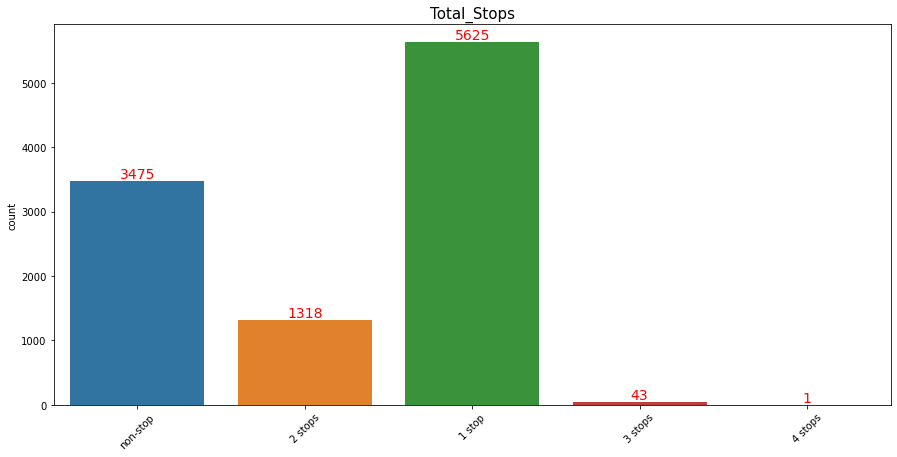

In [30]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Total_Stops'])
ax.set_title('Total_Stops',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* Most Flights make 1 stop before arriving at the destination

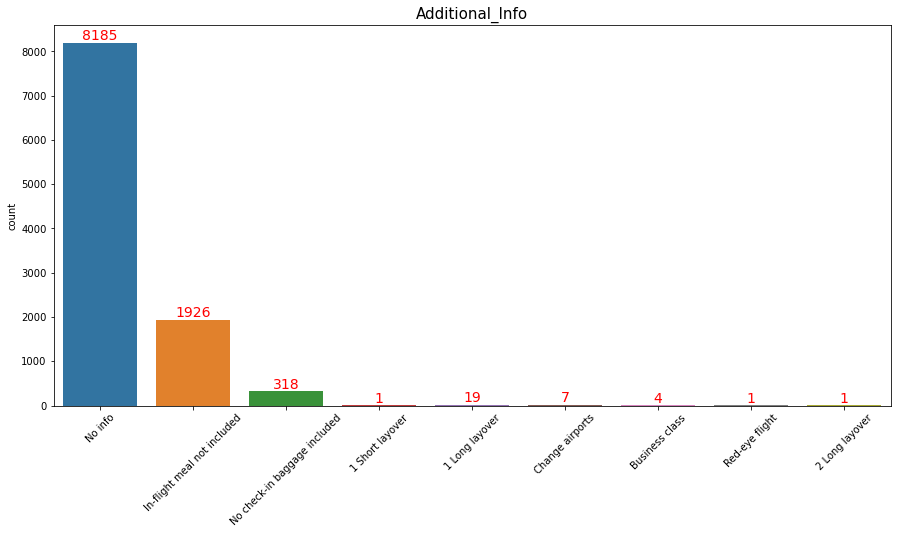

In [31]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Additional_Info'])
ax.set_title('Additional_Info',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

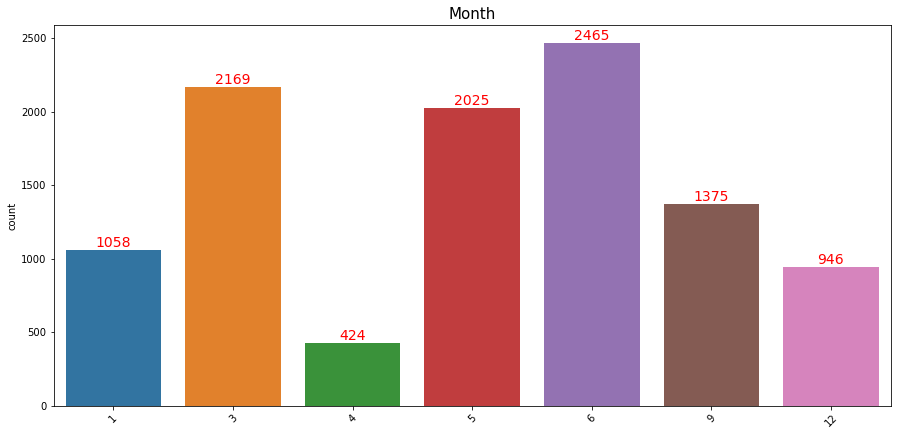

In [32]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Month'])
ax.set_title('Month',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* The dataset contains majority of entries from 'June' Month

Text(0.5, 1.0, 'Duration')

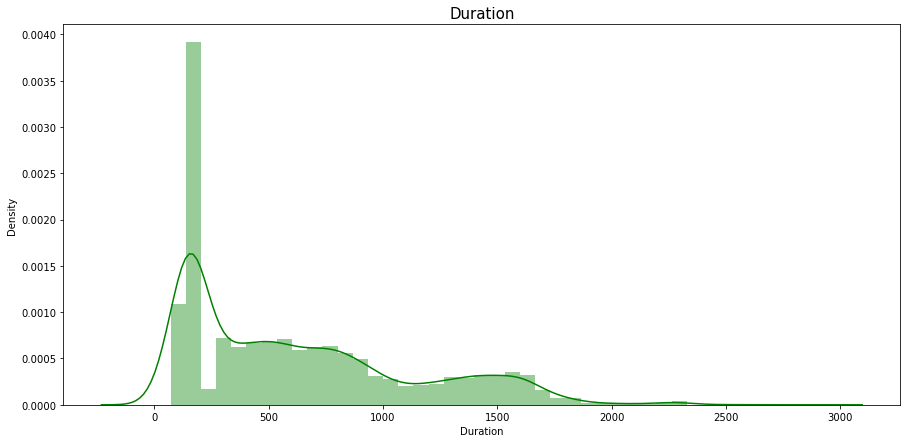

In [33]:
plt.figure(figsize=(15,7))
ax = sns.distplot(df_train['Duration'], color ='green')
ax.set_title('Duration',fontsize=15)

* The distribution is right skewed.
* Most flights have a flight time of less than 500 mins.

Text(0.5, 1.0, 'Price')

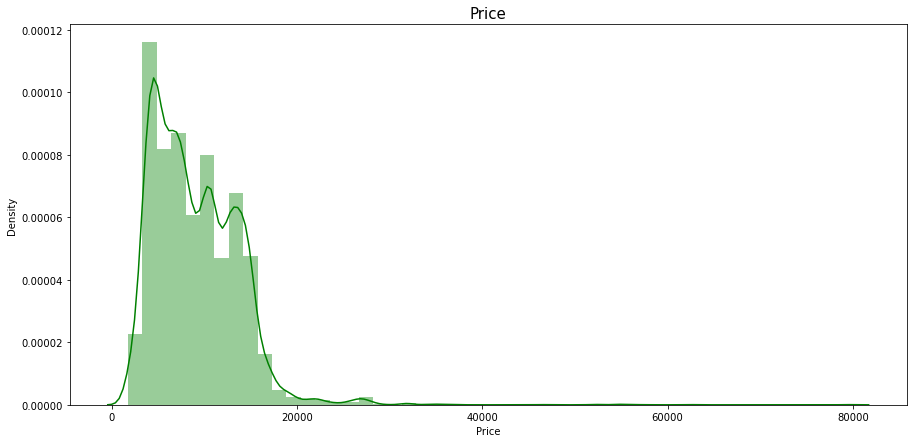

In [34]:
plt.figure(figsize=(15,7))
ax = sns.distplot(df_train['Price'], color ='green')
ax.set_title('Price',fontsize=15)

* Most flight trips Cost less than 20000.
* The distribution is multi modal and right skewed.

### OUTLIER REMOVAL

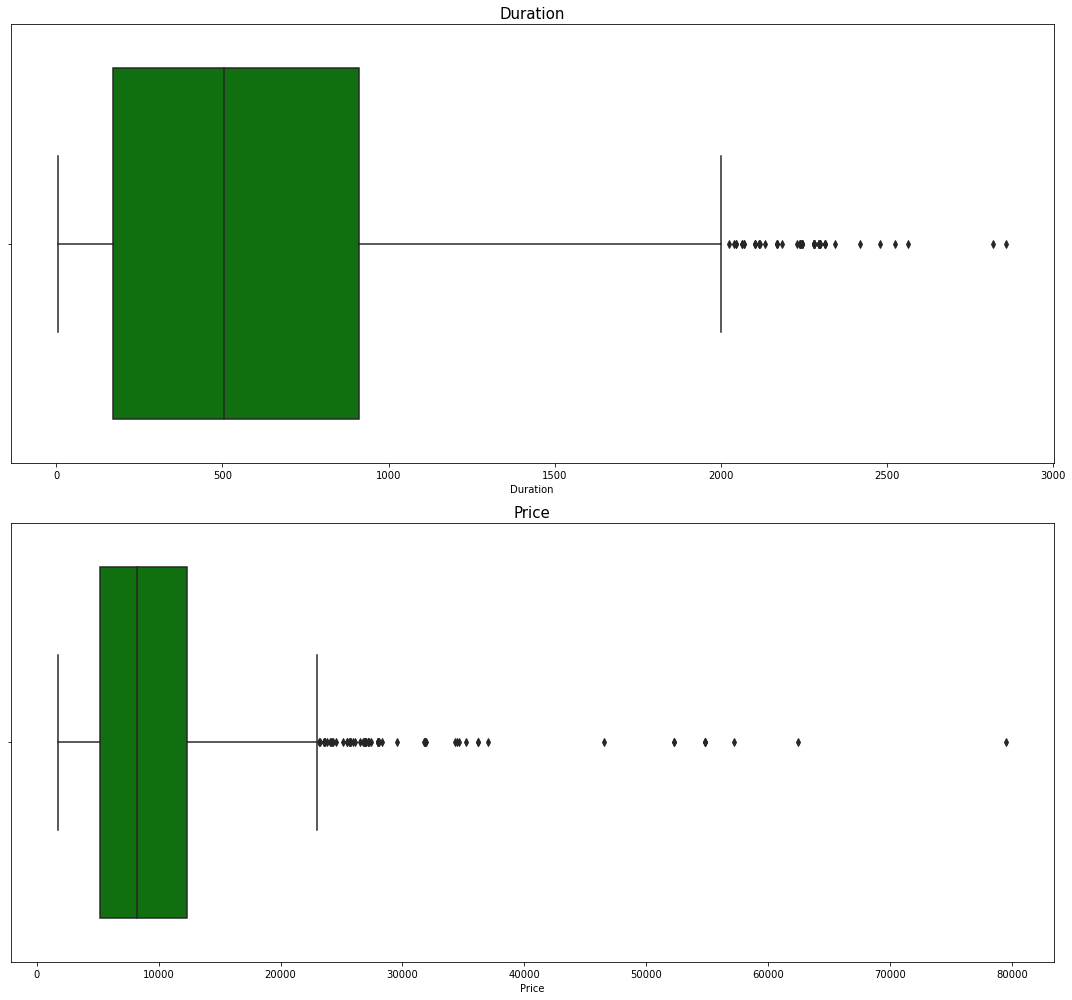

In [35]:
plt.figure(figsize=(15,14))
plt.subplot(2,1,1)
ax = sns.boxplot(df_train['Duration'], orient='h', color ='green')
ax.set_title('Duration',fontsize=15)
plt.subplot(2,1,2)
ax = sns.boxplot(df_train['Price'], orient='h', color ='green')
ax.set_title('Price',fontsize=15)
plt.tight_layout()

* Both Columns contain Higher Outliers
* But removing these outliers might result in removal of entire categories - For example, removing outliers may result in deletion of the 'Jet Airways Business' Category in 'Airline' column 
* So we will proceed without removing outliers

### BIVARIATE ANALYSIS

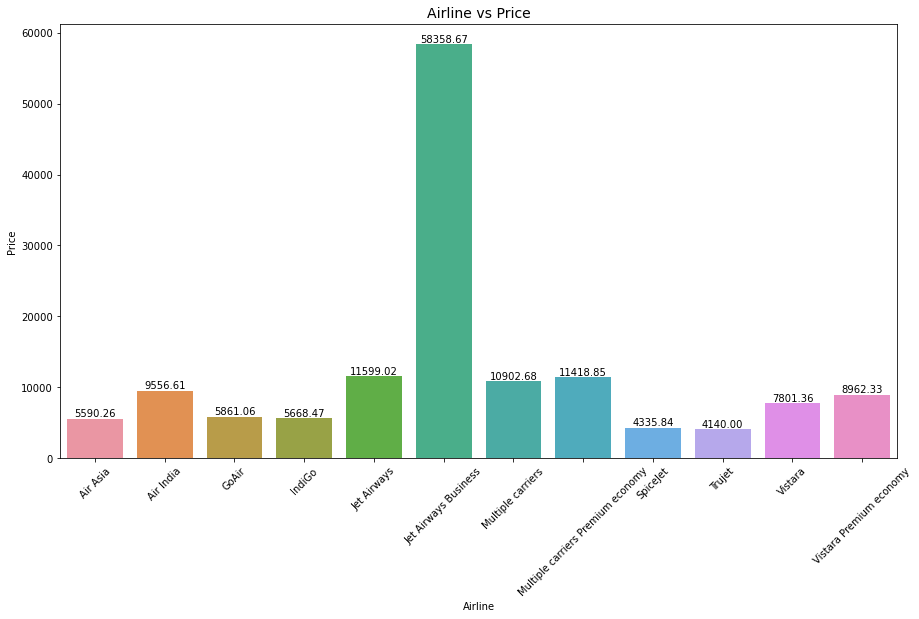

In [36]:
plt.figure(figsize=(15,8))
df_grp1 = df_train[['Airline','Price']].groupby('Airline').mean()
ax = sns.barplot(x=df_grp1.index,y=df_grp1['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Airline vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* 'Jet Airways Bussiness' charges the highest price

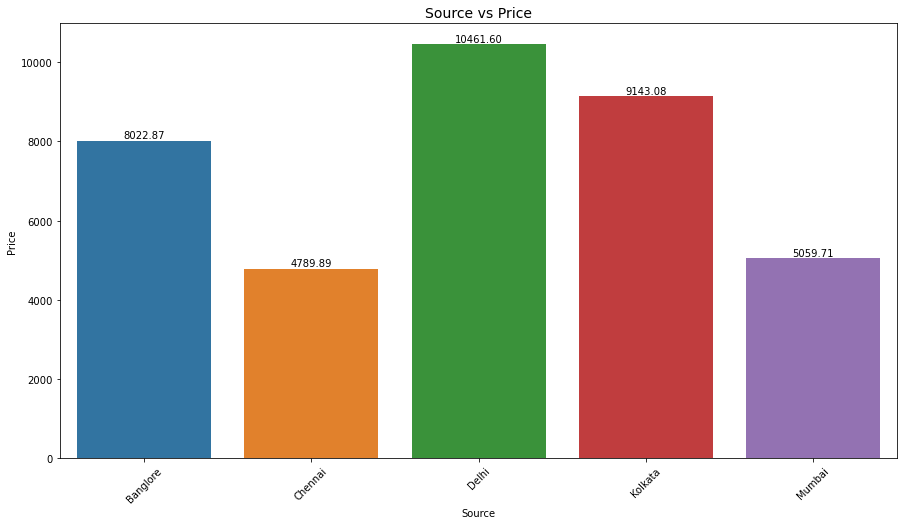

In [37]:
plt.figure(figsize=(15,8))
df_grp2 = df_train[['Source','Price']].groupby('Source').mean()
ax = sns.barplot(x=df_grp2.index,y=df_grp2['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Source vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Price is highest when travelling from Delhi

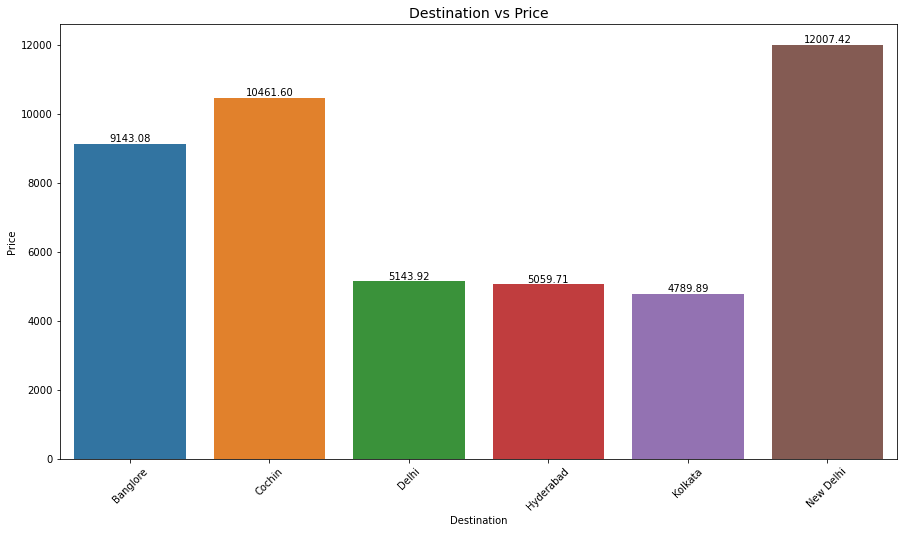

In [38]:
plt.figure(figsize=(15,8))
df_grp3 = df_train[['Destination','Price']].groupby('Destination').mean()
ax = sns.barplot(x=df_grp3.index,y=df_grp3['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Destination vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Price is highest when travelling to Delhi and Cochin

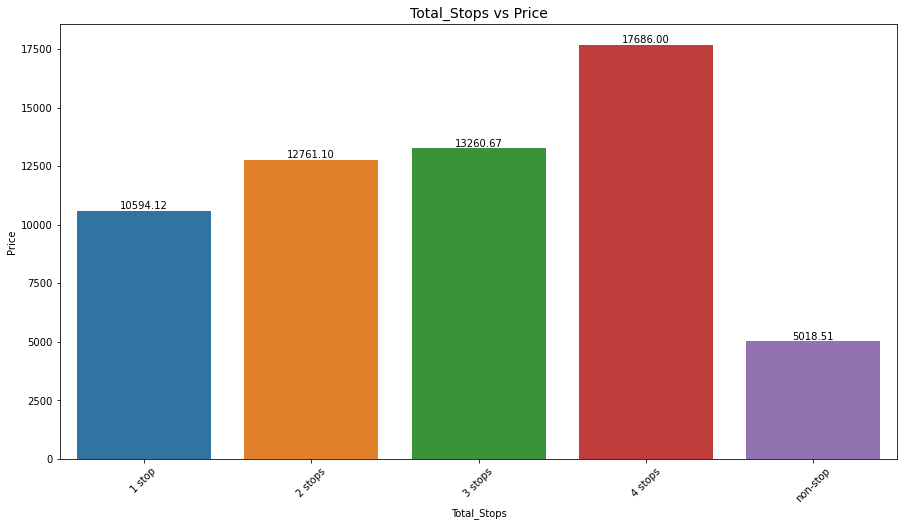

In [39]:
plt.figure(figsize=(15,8))
df_grp4 = df_train[['Total_Stops','Price']].groupby('Total_Stops').mean()
ax = sns.barplot(x=df_grp4.index,y=df_grp4['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Total_Stops vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* No. of stops is directly proportional to Price

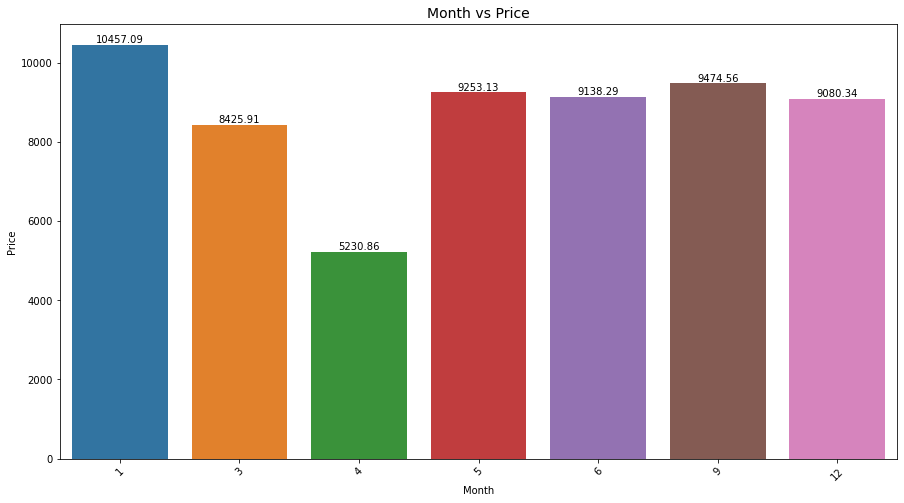

In [40]:
plt.figure(figsize=(15,8))
df_grp5 = df_train[['Month','Price']].groupby('Month').mean()
ax = sns.barplot(x=df_grp5.index,y=df_grp5['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Month vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Prices are cheapest during the month of April

Text(0.5, 1.0, 'Price vs Duration')

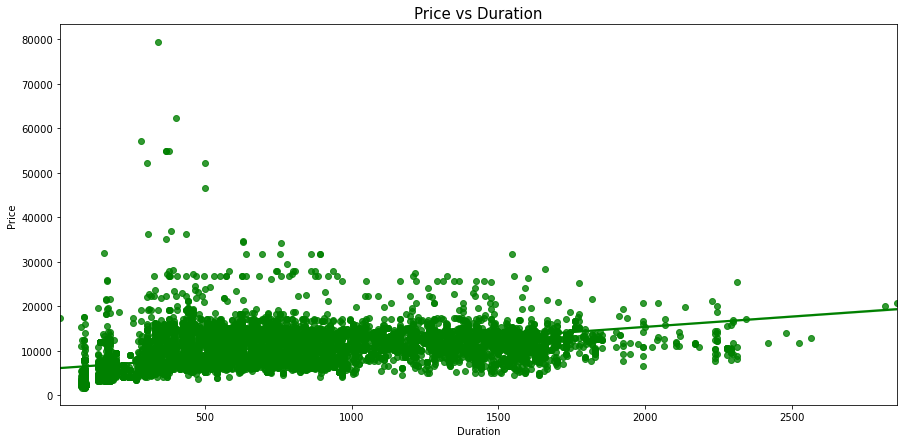

In [41]:
plt.figure(figsize=(15,7))
ax = sns.regplot(x = df_train['Duration'], y = df_train['Price'], color ='green')
ax.set_title('Price vs Duration',fontsize=15)

* Price increases with increase in duration

### CORRELATION

<AxesSubplot:>

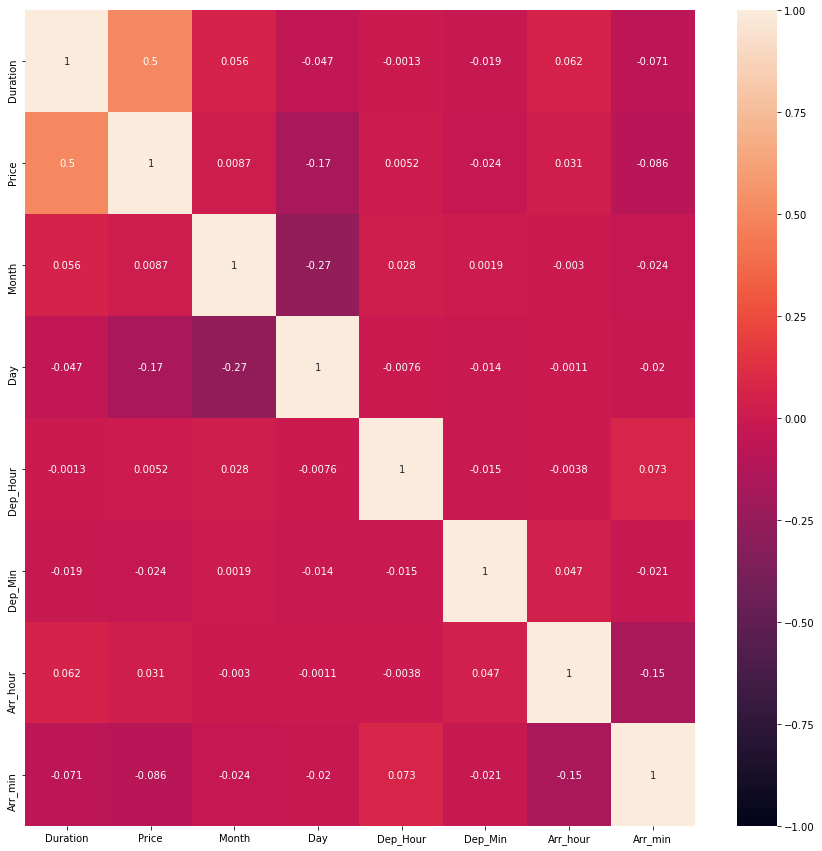

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot = True, vmax =1, vmin=-1)

* Price has a strong positive correlation with duration

### LABEL ENCODING

In [43]:
def cat_dict(l):
    d = {}
    j = 0
    for i in l:
        d[i]=j
        j+=1
    return d

In [44]:
Airline_dict = cat_dict(list(df_train['Airline'].value_counts().index))
Source_dict = cat_dict(list(df_train['Source'].value_counts().index))
Destination_dict = cat_dict(list(df_train['Destination'].value_counts().index))
Route_dict = cat_dict(list(df_train['Route'].value_counts().index))
Total_Stops_dict = cat_dict(list(df_train['Total_Stops'].value_counts().index))
Additional_Info_dict = cat_dict(list(df_train['Additional_Info'].value_counts().index))

In [45]:
df_train['Airline'] = df_train.apply( lambda row: Airline_dict[row['Airline']],axis=1)
df_train['Source'] = df_train.apply( lambda row: Source_dict[row['Source']],axis=1)
df_train['Destination'] = df_train.apply( lambda row: Destination_dict[row['Destination']],axis=1)
df_train['Route'] = df_train.apply( lambda row: Route_dict[row['Route']],axis=1)
df_train['Total_Stops'] = df_train.apply( lambda row: Total_Stops_dict[row['Total_Stops']],axis=1)
df_train['Additional_Info'] = df_train.apply( lambda row: Additional_Info_dict[row['Additional_Info']],axis=1)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10462 non-null  int64
 1   Source           10462 non-null  int64
 2   Destination      10462 non-null  int64
 3   Route            10462 non-null  int64
 4   Duration         10462 non-null  int64
 5   Total_Stops      10462 non-null  int64
 6   Additional_Info  10462 non-null  int64
 7   Price            10462 non-null  int64
 8   Month            10462 non-null  int64
 9   Day              10462 non-null  int64
 10  Dep_Hour         10462 non-null  int64
 11  Dep_Min          10462 non-null  int64
 12  Arr_hour         10462 non-null  int64
 13  Arr_min          10462 non-null  int64
dtypes: int64(14)
memory usage: 1.1 MB


In [47]:
def cat_dict(l,d):
    j = len(d)
    for i in l:
        if i not in d:
            d[i] = j
            j+=1
    return d

In [48]:
Airline_dict = cat_dict( list(df_test['Airline'].value_counts().index), Airline_dict)
Source_dict = cat_dict( list(df_test['Source'].value_counts().index), Source_dict)
Destination_dict = cat_dict( list(df_test['Destination'].value_counts().index), Destination_dict)
Route_dict = cat_dict( list(df_test['Route'].value_counts().index), Route_dict)
Total_Stops_dict = cat_dict( list(df_test['Total_Stops'].value_counts().index), Total_Stops_dict)
Additional_Info_dict = cat_dict( list(df_test['Additional_Info'].value_counts().index), Additional_Info_dict)

In [49]:
df_test['Airline'] = df_test.apply( lambda row: Airline_dict[row['Airline']],axis=1)
df_test['Source'] = df_test.apply( lambda row: Source_dict[row['Source']],axis=1)
df_test['Destination'] = df_test.apply( lambda row: Destination_dict[row['Destination']],axis=1)
df_test['Route'] = df_test.apply( lambda row: Route_dict[row['Route']],axis=1)
df_test['Total_Stops'] = df_test.apply( lambda row: Total_Stops_dict[row['Total_Stops']],axis=1)
df_test['Additional_Info'] = df_test.apply( lambda row: Additional_Info_dict[row['Additional_Info']],axis=1)

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int64
 1   Source           2671 non-null   int64
 2   Destination      2671 non-null   int64
 3   Route            2671 non-null   int64
 4   Duration         2671 non-null   int64
 5   Total_Stops      2671 non-null   int64
 6   Additional_Info  2671 non-null   int64
 7   Month            2671 non-null   int64
 8   Day              2671 non-null   int64
 9   Dep_Hour         2671 non-null   int64
 10  Dep_Min          2671 non-null   int64
 11  Arr_hour         2671 non-null   int64
 12  Arr_min          2671 non-null   int64
dtypes: int64(13)
memory usage: 271.4 KB


### SKEWNESS REMOVAL

In [51]:
df_train['Duration'].skew()

0.9039730204553532

* 'Duration' column has skewness over the threshold value of +/-0.5.

In [52]:
x = df_train.drop('Price',axis=1)
y = df_train['Price']
test_x = df_test.copy()

In [53]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['Duration']],method='yeo-johnson'))
transf1 = pd.DataFrame(power_transform(test_x[['Duration']],method='yeo-johnson'))
transf.rename({0:'Duration'}, axis=1, inplace = True)
transf1.rename({0:'Duration'}, axis=1, inplace = True)
x.drop('Duration',axis=1 ,inplace=True)
test_x.drop('Duration',axis=1 ,inplace=True)
x = pd.concat((x,transf), axis=1)
test_x = pd.concat((test_x,transf1), axis=1)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration
0,1,2,3,1,1,0,3,24,22,20,1,10,-1.046443
1,2,1,1,73,2,0,1,5,5,50,13,15,-0.029108
2,0,0,0,27,2,0,9,6,9,25,4,25,1.071667
3,1,1,1,62,0,0,12,5,18,5,23,30,-0.372994
4,1,2,3,92,0,0,1,3,16,50,21,35,-0.513321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,6,1,1,3,1,0,9,4,19,55,22,25,-1.171125
10458,2,1,1,3,1,0,4,27,20,45,23,20,-1.138628
10459,0,2,2,1,1,0,4,27,8,20,11,20,-0.988932
10460,5,2,3,1,1,0,1,3,11,30,14,10,-1.107050


In [54]:
test_x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration
0,0,0,0,0,0,0,6,6,17,30,4,25,0.373701
1,1,1,1,16,0,0,12,5,6,20,10,20,-0.727748
2,0,0,0,0,0,1,5,21,19,15,19,0,1.343131
3,3,0,0,0,0,0,5,21,8,0,21,0,0.582189
4,6,2,2,1,1,0,6,24,23,55,2,45,-1.070348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2,1,1,5,0,0,6,6,20,30,20,25,1.352354
2667,1,1,1,3,1,0,3,27,14,20,16,55,-1.159200
2668,0,0,0,0,0,0,6,3,21,50,4,25,-0.201183
2669,2,0,0,0,0,0,6,3,4,0,19,15,0.777379


### MODEL BUILDING

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
x_t = pd.DataFrame(x_t)
x_c_test = sc.fit_transform(test_x)
x_c_test = pd.DataFrame(x_c_test)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{'alpha':[200, 250, 275, 300, 500]}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8,50,100,150,200], 
                                 'min_samples_leaf':[1,2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsRegressor(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan']
                                      }
                            }
}

In [56]:
max_scr = 0

for r_s in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        r2 = r2_score(y_test,pred_test)
        if r2 > max_scr:
            max_scr = r2
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",best_r_s

Model :  RandomForestRegressor()
Score :  0.9275924998902004
Random State :  34


In [57]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=34,test_size=0.20)
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=4, scoring = 'r2')
grid.fit(x_train,y_train)
print({
    'model': 'Random Forest',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})

{'model': 'Random Forest', 'best_score': 0.9314932466255399, 'best_params': {'max_depth': 100, 'min_samples_leaf': 1, 'n_estimators': 100}}


### RANDOM FOREST REGRESSOR PERFORMS BEST AND HAS AN R2 SCORE OF 0.93 AND PERFORMS BEST AT RANDOM STATE 34

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
random_forest = RandomForestRegressor(max_depth=100, min_samples_leaf=1, n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('R2 Score : ',r2_score(y_test,y_pred))
print('RMSE Score : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('MSE Score : ',mean_squared_error(y_test,y_pred))
print('RMAE Score : ',np.sqrt(mean_absolute_error(y_test,y_pred)))

R2 Score :  0.9259616447056924
RMSE Score :  1231.4709489623865
MSE Score :  1516520.6981383206
RMAE Score :  24.878228906175487


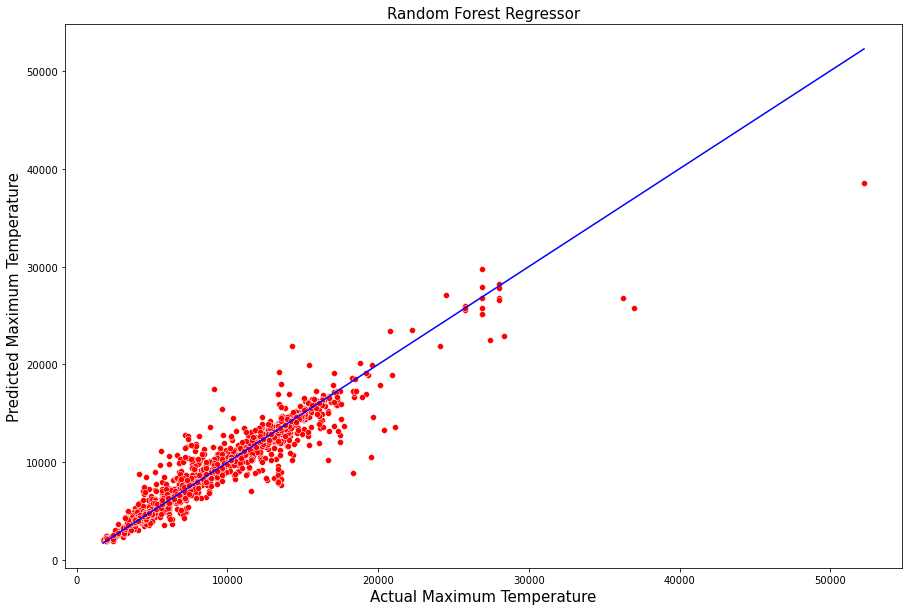

In [59]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y_test,y_pred,color='r')
ax = sns.lineplot(y_test,y_test,color='b')
ax.set_xlabel('Actual Maximum Temperature',fontsize=15)
ax.set_ylabel('Predicted Maximum Temperature',fontsize=15)
ax.set_title('Random Forest Regressor',fontsize=15)
plt.show()

In [60]:
y_pred = random_forest.predict(x_c_test)
df_test['Predicted_Price'] = y_pred
df_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month,Day,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Predicted_Price
0,0,0,0,0,655,0,0,6,6,17,30,4,25,14723.540000
1,1,1,1,16,240,0,0,12,5,6,20,10,20,4256.680000
2,0,0,0,0,1425,0,1,5,21,19,15,19,0,12898.000000
3,3,0,0,0,780,0,0,5,21,8,0,21,0,10302.256167
4,6,2,2,1,170,1,0,6,24,23,55,2,45,3420.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2,1,1,5,1435,0,0,6,6,20,30,20,25,10228.200000
2667,1,1,1,3,155,1,0,3,27,14,20,16,55,5144.230000
2668,0,0,0,0,395,0,0,6,3,21,50,4,25,16127.280000
2669,2,0,0,0,915,0,0,6,3,4,0,19,15,14142.670000


In [61]:
df_test[['Predicted_Price']].describe()

,Predicted_Price
count,2671.000000
mean,9137.195875
std,4397.546980
min,1971.320000
25%,5534.195000
50%,8638.180000
75%,12340.500000
max,61768.980000


Text(0.5, 1.0, 'Predicted_Price')

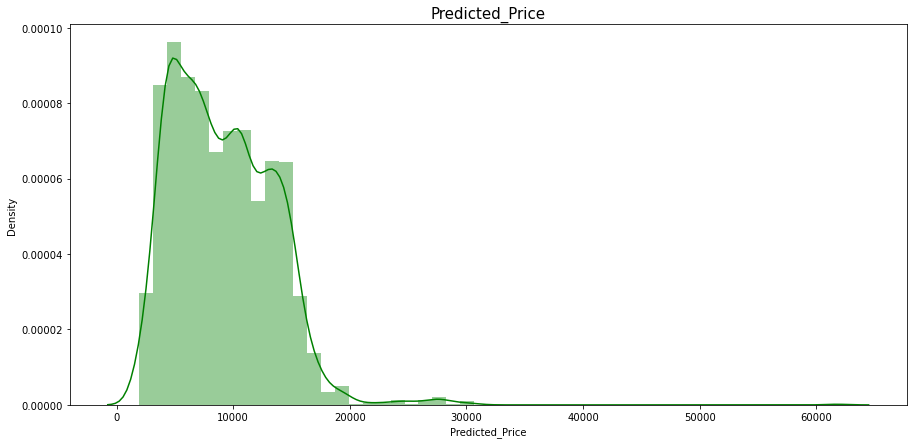

In [62]:
plt.figure(figsize=(15,7))
ax = sns.distplot(df_test['Predicted_Price'], color ='green')
ax.set_title('Predicted_Price',fontsize=15)

In [63]:
df_test.to_csv("Flight_Ticket_Price_Predicted.csv", index=False)

In [64]:
import joblib
joblib.dump(random_forest,"Max_Temp_Random_forest_regressor.pkl")

['Max_Temp_Random_forest_regressor.pkl']